## Exercício Programa 5
## Busca de substrings através do algoritmo de Knuth-Morris-Pratt

**Nome:** Raphael Cardoso de Almeida

**NUSP:** 11258120

### 1. Introdução

Algoritmos de busca de uma substring dentro de uma outra string estão entre os mais importantes em aplicativos como editores de texto e ferramentas de edição de programas. Devido a sua larga utilização, ao longo do tempo, foram desenvolvidos vários tipos de algoritmos de busca visando à diminuição da complexidade do número de operações. Em particular, o algoritmo de Knuth-Morris-Pratt ou algoritmo KMP será o objeto de estudo do EP1.

A referência bibliográfica principal é o Livro:

**Robert Sedgewick & Kevin D. Wayne, Algorithms, Addison Wesley, 4a. edição, 2011.**

O algoritmo de concepção mais simples para buscas de substrings é muitas vezes denominado algoritmo de força bruta
(brute force). Uma versão na linguagem Python é apresentado na célula abaixo.

Uma ilustração de como o algoritmo atua é apresentado na figura abaixo. A substring a ser encontrada no texto é usualmente denominada padrão (pattern) que é implementado através do array `pat[]` de dimensão `M` onde em cada
posição se encontra um caracter. O texto é implementado através do array `txt[]` de dimensão `N`. Obviamente o problema só tem sentido se `N>M`

Dois laços são implementados, o mais externo para percorrer cada caracter do array `txt[]` é indexado pela variável `i` e o mais interno para percorrer cada caracter do array `pat[]` é indexado pela variável `j`.

O algoritmo faz o array `pat[]` se movimentar ao longo do array `txt[]`. Os caracteres são comparados posição por posição no laço interno,
se houver um caracter não coincidente o algoritmo abandona o laço interno e passa para uma nova iteração do laço externo onde o
valor de `i` é incrementado.
No laço interno se todos os caracteres do padrão coincidirem então a busca é encerrada retornando
o índice `i`.
Caso nenhum padrão é encontrado retorna-se o valor `N`.
O algoritmo só identifica a primeira ocorrência de um padrão, mas é facilmente modificável para identificar todas as ocorrências.

Note que o array `txt[]` é percorrido no laço interno utilizando o índice `i+j`. Se for encontrado um caracter não coincidente o processo se reinicia
no laço externo. Dessa forma, caracteres de `txt[]` que já foram lidos e verificados são testados novamente.
Por exemplo, na figura abaixo, pode ser observado que o caracter `txt[1]='B'` é testado na primeira interação (`i=0`) e na segunda
interação (`i=1`).
Os índices utilizados para percorrer os dois arrays devem ser incrementados e depois decrementados.
Tanto `i` quanto `j` voltam para trás ou na língua Inglesa, **back up**. Como já observado `txt[]` utiliza `i+j` para ir à frente
mas o termo **back up** `i` é utilizado para indicar que o índice deve voltar para trás e testar caracteres que já são conhecidos.

A complexidade do algoritmo é O(NM). Seria possível um desempenho melhor ?
Seria possível um algoritmo tal que `i` não tenha que retroceder evitando assim
repetir leituras e comparações já realizadas ?

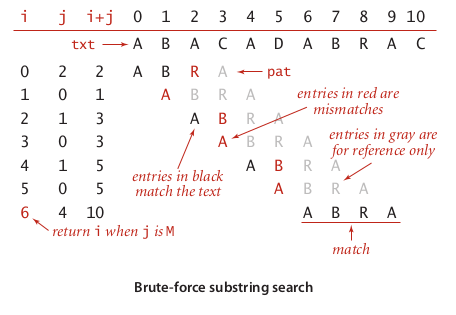

**Figura 1 - Algoritmo Força Bruta (Fonte: Sedgewick & Wayne, pg. 760)**

In [1]:
def bruteforce(txt, pat):
  N = len(txt)
  M = len(pat)
  listadeposicoes = []
  print('N = ',N,'M = ',M)
  for i in range(0,N-M+1):
    for j in range(0,M):
      # print('i = ',i,' j = ', j)
      if ( txt[i+j] != pat[j] ): # se o caracter nao coincide
          break                       # break interrompe o for j
      if (j == M-1): return(i)
  return(N)
x = bruteforce('abacadabra','aca')
print('Posicao em txt = ',x)
x = bruteforce('abacadabra','abr')
print('Posicao em txt = ',x)

N =  10 M =  3
Posicao em txt =  2
N =  10 M =  3
Posicao em txt =  6


#### Uma pequena digressão

O algoritmo de knuth-Morris-Pratt utiliza uma estrutura matemática denominada Autômato Finito Determinístico (Deterministic Finite Automata - DFA) que pode ser representado por um grafo com arcos direcionados (A figura abaixo ilustra um exemplo de DFA que aceita '0's e '1's). Os círculos representam os estados  $S_1$ e $S_2$ sendo
que $S_1$ é o estado inicial.
Em cada estado o símbolo '0'  provoca uma transição de estado, de $S_1$ para $S_2$ e vice-versa,
e o símbolo '1' faz o estado permanecer o mesmo.

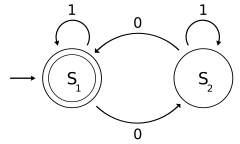

Essa máquina de estados pode ser representada através de uma tabela de transição de estados como apresentado 
na figura abaixo:

\begin{array}{|l|l|l|}
\hline & \mathbf{0} & \mathbf{1} \\
\hline \boldsymbol{S}_{\mathbf{1}} & S_2 & S_1 \\
\hline \boldsymbol{S}_{\mathbf{2}} & S_1 & S_2 \\
\hline
\end{array}


### 2. Algoritmo de Knuth-Morris-Pratt

O algoritmo KMP não necessita retroceder o índice que é utilizado para percorrer o array `txt[]` somente `j` (índice de `pat[]`) avança e 
retrocede. A complexidade desse algoritmo é linear  O(N+M).
O algoritmo utiliza um autômato finito determinístico para armazenar informações sobre como avançar e retroceder o índice 
`j`.

O autômato é representado através de uma tabela de transição de estados implementada no array `dfa[][]`.
A construção desse autômato só depende da string que representa o padrão a ser identificado.

Na figura abaixo apresenta-se o autômato finito (representado por um grafo e também por uma tabela de transição de estados
implementado pelo array `dfa[][]`) utilizado para identificação do padrão `pat='ABABAC'`.
Existem 7 estados representados pelos círculos numerados no intervalo `0..6`.
Cada estado representa um caracter do padrão, por exemplo, o estado `0` representa um estado que espera a chegada
de um caracter `'A'`, se chegar um caracter `'A'` (no caso proveniente de `txt[]`) uma transição ocorre para o estado `1`. Se o
caracter que chegar é `'B'` ou `'C'` então permanece-se no mesmo estado `0`.

No estado `1` espera-se a chegada de um caracter `'B'`, se chegar um caracter `'B'` uma transição ocorre para o estado `2`.
Se o caracter que chegar é `'A'` permanece-se no mesmo estado `1` e se o caracter que chegar é `'C'` retorna-se ao estado `0`.

Para cada coincidência existe um avanço para o estado seguinte até que o estado `6` (halt state) é atingido finalizando a identificação do
padrão. Se não houver coincidência permanece-se no mesmo estado ou retorna-se para algum estado anterior que
seja conveniente. Para cada transição o estado coincide com o valor de `j`.

Seja o exemplo abaixo:

`txt[i]`
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 'A' | 'B' | 'A' | **'A'** | 'B' | 'A' | 'B' | 'A' | 'C' |

`pat[j]`
| 0 | 1 | 2 | 3 | 4 | 5 |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 'A' | 'B' | 'A' | **'B'** | 'A' | 'C' |

O algoritmo faz as leituras de `txt[i]` 
e compara com `pat[j]`.
Quando o algoritmo verifica a posição `txt[3]='A'` e `pat[3]='B'` verifica-se uma não coincidência.
Utilizando a informação do autômato deve-se retornar ao estado `j=1`
A leitura do texto continua em `txt[i=4]='B'` que é comparado com `pat[j=1]='B'`, e assim por diante até
`txt[8]='C'` e `pat[j=5]='C'` onde pode-se concluir há uma ocorrência do padrão.
**Veja que nesse processo o índice `i` nunca recua.**

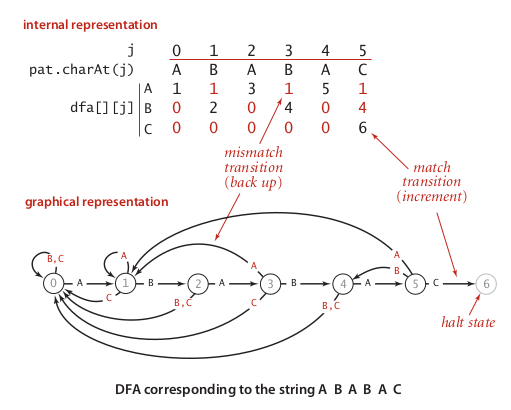

**Figura 2 - Autômato Finito Determinístico e sua implementação no array `dfa[][]` (Fonte: Sedgewick & Wayne)**

#### Algoritmo de busca

Utilizando o autômato finito fica bastante fácil implementar o algoritmo de busca KMP.

1. O estado inicial é dado por `J=0`
2. Para cada caracter `txt[i]`  utilizar a tabela de transição de estados `dfa[][]` para inferir qual o próximo estado `j`.
3. Se `j=6`então foi identificado o padrão
4. Se acabaram os caracteres de `txt[]' então não existe o padrão no texto.



#### Construção do autômato no array `dfa[][]`

Para a implementação do algoritmo vamos utilizar um dicionário contendo o alfabeto da máquina de estado, ou seja,
o conjunto dos símbolos que aparecem no texto.

No exemplo em questão existem apenas três símbolos que definem o alfabeto: 'A', 'B' e 'C'. O tamanho do alfabeto
será definido aqui como `L`.
O padrão é dado por `'ABABAC'`
Vamos definir uma variável `ialfa` do tipo dicionário que associa a cada símbolo do alfabeto um índice
que identificará uma linha do array `dfa[][]` dessa forma o número de linhas terá a mesma dimensão
do alfabeto. Nas implementações usuais utiliza-se `dfa[][]` com a dimensão 256 porque admite-se todo o conjunto de caracteres ASCII como alfabeto.

`ialfa={'A':0, 'B':1, 'C':2}`

Dessa forma podemos utilizar:

`x=ialfa['A']`

`x` contém o valor 0

`x=ialfa['B']`

`x` contém o valor 1

A figura abaixo ilustra passo a passo a construção do array `dfa[][]`.
 
O algoritmo pode ser descrito da seguinte forma:

Inicialmente cria-se um array `dfa[L][M]` com todos elementos nulos

Faz-se `dfa[ialfa[pat[0]]][0] = 1`

Isso indica que se houver uma coincidência com o primeiro elemento `pat[0]` então a linha de `dfa[][]`
correspondente deve conter o valor 1 indicando que a máquina de estados deve-se movimentar para
o estado 1.

As demais posições da coluna ficam com 0 indicando que se não há coincidência (no caso para 'B' e 'C')
permanece-se no mesmo estado, ou seja, no estado 0. A figura abaixo resume essas operações.

O exemplo da figura foi desenvolvido na linguagem Java. Note que na figura a variável `pat.charAt(j)` faz o acesso ao caracter
de índice `j`na string `pat`. Isso pode ser utilizado da seguinte forma: `dfa[pat.charAt(j)][]` pois `pat.charAt(j)`é interpretado
como número inteiro (código ASCII).

Na linguagem Python isso não é necessário. Podemos utilizar a sintaxe `pat[j]` para acessar o caracter da string
na posição `j`.

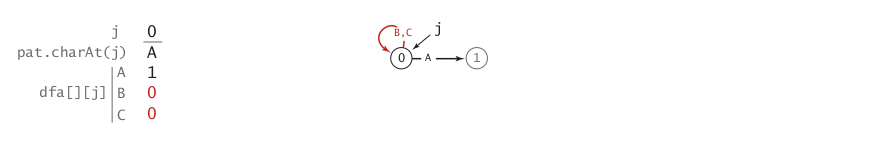

Para a construção das colunas 1 a 6 inicialmente faz-se `X=0`
depois os seguintes passos são repetidos:

1. Copia `dfa[][X]` para `dfa[][j]`
2. `dfa[ialfa[pat[j]]][j] = j+1`
3. `X = dfa[ialfa[pat[j]]][X]`

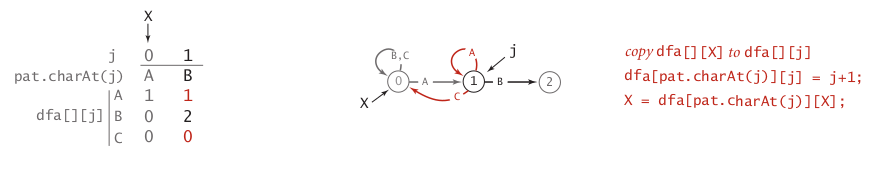


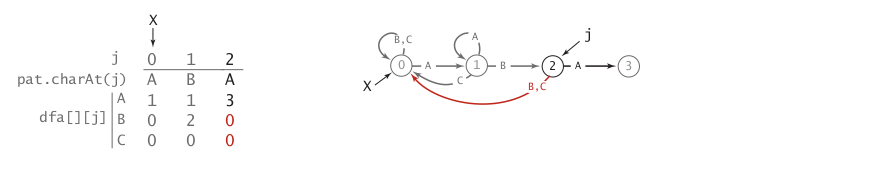


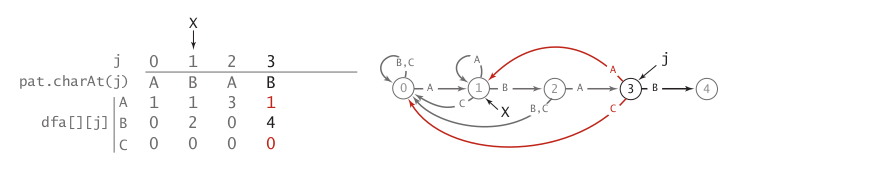


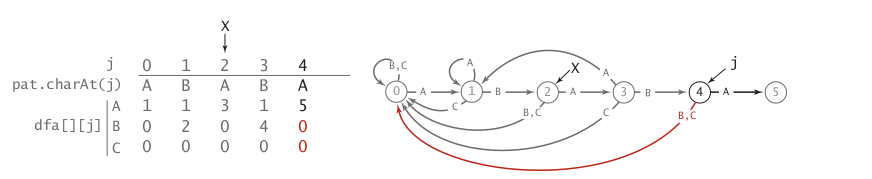


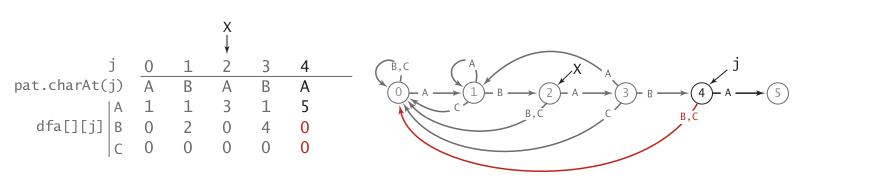


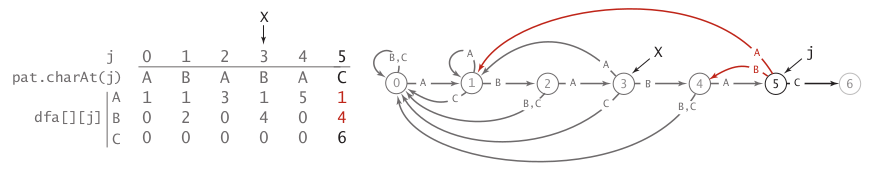



### 3. Para você fazer
### Parte 1

A sua tarefa é completar a classe `KMP` cujo esqueleto se encontra na célula abaixo. A classe `KMP` é composta por duas funções:
1. `__init__()`
2. `search()`

Na função `__init__()` é necessário inserir o código que monta a tabela de transições de estados no array `dfa[][]`.

Na função `search()` deve ser inserido todo o código de busca que lê caracteres do texto contido em `txt[]` e descobre se existe a
ocorrência do padrão contido em `pat[]`.

Ao final da célula existe uma função `teste()` que pode ser utilizada para testes.
Na célula seguinte alguns testes simples são propostos para você verificar o funcionamento do seu programa.

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 40)

def copyColumn(matriz, toCopy, indexColumn):
    columnLen = len(matriz)
    for i in range(columnLen):
        matriz[i][indexColumn] = matriz[i][toCopy]
        
    return matriz

In [3]:
class KMP:
    def __init__(self, pat, alfabeto):
        # pat - string contendo o padrao
        # alfabeto - string contendo o alfabeto
        self.pat = pat
        self.M = len(pat) # Tamanho do Padrão
        self.alfabeto = alfabeto
        self.L = len(alfabeto) # Tamanho do Alfabeto
        # Alfabeto: Dicionario que contém todos os simbolos presentes no texto

        self.ialfa = dict() #Definindo o atributo ialfa como um dicionário
        for k in range(self.L):
            self.ialfa[alfabeto[k]] = k #Adiciona a letra da string alphabet e seu respectivo número

        # dfa[][] array que define o automato finito
        #Inicialmente cria-se um array dfa[L][M] com todos elementos nulos
        self.dfa = [[0 for col in range(self.M)] for row in range(self.L)]
        #As linhas L são os caracteres do alfabeto
        #A coluna M  são os caracteres do padrão

        # construcao de dfa
        self.dfa[self.ialfa[pat[0]]][0] = 1 #Faz-se dfa[ialfa[pat[0]]][0] = 1
        self.X = 0
        for col in range(1, self.M): #Repete-se de 1 à len(Padrão)
            self.dfa = copyColumn(self.dfa, self.X, col)  #Copia dfa[][X] para dfa[][j]
            self.dfa[self.ialfa[pat[col]]][col] = col+1 #dfa[ialfa[pat[j]]][j] = j+1
            self.X = self.dfa[self.ialfa[pat[col]]][self.X] #X = dfa[ialfa[pat[j]]][X]


    def dfaPrint(self):
        listIndex = list(self.ialfa.keys())
        df = pd.DataFrame(self.dfa)
        df = df.set_index(pd.Index(listIndex))
        return df

    def search(self,txt): # devolve o indice da posicao do array txt
        j = 0
        for i in range(len(txt)):
            if j == self.M:
                break

            else:
                if txt[i] in self.ialfa:
                    j = self.dfa[self.ialfa[txt[i]]][j]

        if j == self.M:
            return i - self.M
        else:
            return txt

    def searchMod(self,txt): # devolve uma lista com as posições do padrão no array txt
        j = 0
        occurrenceList = []

        for i in range(len(txt)):
            if j == self.M:
                occurrenceList.append(i - self.M)
                j = 0
                j = self.dfa[self.ialfa[txt[i]]][j]

            else:
                if txt[i] in self.ialfa:
                    j = self.dfa[self.ialfa[txt[i]]][j]

        if (len(occurrenceList) > 0):
            return occurrenceList
        else:
            return txt

def teste(pat,alfabeto,txt):
    N = len(txt)
    kmp = KMP(pat,alfabeto)
    indice = kmp.search(txt)

    if indice == txt:
        print('Padrao nao foi encontrado')
    else:
        print('Padrao foi encontrado na posicao = ',indice)

def testeMod(pat,alfabeto,txt):
    N = len(txt)
    kmp = KMP(pat,alfabeto)
    indice = kmp.searchMod(txt)

    if indice == txt:
        print('Padrão não encontrado')
    else:
        print('Padrao foi encontrado nas posições = ', ", ".join(map(str,indice)))

In [4]:
teste('ABABAC','ABC', 'ABAABABAC')
teste('ABABACB','ABC','BCBAABACAABABACAA')
teste('AABA','ABC','BBCACAAAABABABACAA')

Padrao foi encontrado na posicao =  2
Padrao nao foi encontrado
Padrao foi encontrado na posicao =  7


### Testes principais

Na célula abaixo a string `txt` contêm um trecho de DNA humano.
Realize testes com os seguintes padrões:
1. `pat='ACAAAAATGATCTTTGTCGGCATTA'`
2. `pat='AAGGAAGAAAGGGCAGACTTAATAG'`
3. `pat='GCAAGCACAAGACTG'`

Para cada caso imprima na tela o array `dfa[][]`

In [5]:
txt='ATGGGTGATGTTGAGAAAGGCAAGAAGATTTTTATTATGAAGTGTTCCCAGTGCCACACCGTTGAAAAGGGAGGCAAGCACAAGACTGGGCCAAATCTCCATGGTCTCTTTGGGCGGAAGACAGGTCAGGCCCCTGGATACTCTTACACAGCCGCCAATAAGAACAAAGGCATCATCTGGGGAGAGGATACACTGATGGAGTATTTGGAGAATCCCAAGAAGTACATCCCTGGAACAAAAATGATCTTTGTCGGCATTAAGAAGAAGGAAGAAAGGGCAGACTTAATAGCTTATCTCAAAAAAGCTACTAATGAGTAA'


In [6]:
teste('ACAAAAATGATCTTTGTCGGCATTA','ACGT', txt)
teste('AAGGAAGAAAGGGCAGACTTAATAG','ACTG', txt)
teste('GCAAGCACAAGACTG', 'CTAG', txt)

Padrao foi encontrado na posicao =  234
Padrao foi encontrado na posicao =  264
Padrao foi encontrado na posicao =  73


In [7]:
teste1 = KMP('ACAAAAATGATCTTTGTCGGCATTA','ACGT')
teste1.dfaPrint()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
A,1,1,3,4,5,6,7,1,1,10,1,1,1,1,1,1,1,1,1,1,1,22,1,1,25
C,0,2,0,2,2,2,2,2,0,0,2,12,0,0,0,0,0,18,0,0,21,0,2,0,0
G,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,16,0,0,19,20,0,0,0,0,0
T,0,0,0,0,0,0,0,8,0,0,11,0,13,14,15,0,17,0,0,0,0,0,23,24,0


In [8]:
teste2 = KMP('AAGGAAGAAAGGGCAGACTTAATAG','ACTG')
teste2.dfaPrint()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
A,1,2,2,1,5,6,2,8,9,10,2,1,5,1,15,2,17,2,1,1,21,22,2,24,2
C,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,18,0,0,0,0,0,0,0
T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,20,0,0,23,0,0
G,0,0,3,4,0,0,7,4,0,3,11,12,13,0,0,16,0,0,0,0,0,0,3,0,25


In [9]:
teste3 = KMP('GCAAGCACAAGACTG', 'CTAG')
teste3.dfaPrint()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
C,0,2,0,0,0,6,0,8,0,0,0,2,13,0,0
T,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0
A,0,0,3,4,0,0,7,4,9,10,0,12,0,0,0
G,1,1,1,1,5,1,1,1,1,1,11,1,1,1,15


### Parte 2: Modificação do algoritmo

O algoritmo como proposto acima só identifica a ocorrência do primeiro padrão encontrado (caso exista), ou seja, não identifica todas as ocorrẽncias de um padrão.

Apresente na próxima célula uma modificação do algoritmo KMP de tal forma que todas as ocorrências de um padrão são identificadas.

Elabore um conjunto de testes para mostrar que a sua solução funciona.

#### Nota do Aluno:

Bem, achei mais simples criar uma função modificada na própria classe KMP. Uma vez que a dfa se manteria a mesma, eu apenas precisava
fazer o algoritmo não parar na primeira ocorrencia e armazenar os indices onde fosse encontrado o padrão e de uma forma onde i nunca retornasse

vou deixar o algoritmo comentado:

In [10]:
"""
    def searchMod(self,txt): # devolve uma lista com as posições do padrão no array txt
        j = 0
        occurrenceList = []

        for i in range(len(txt)):
            if j == self.M:
                occurrenceList.append(i - self.M)
                j = 0
                j = self.dfa[self.ialfa[txt[i]]][j]

            else:
                if txt[i] in self.ialfa:
                    j = self.dfa[self.ialfa[txt[i]]][j]

        if (len(occurrenceList) > 0):
            return occurrenceList
        else:
            return txt
"""

'\n    def searchMod(self,txt): # devolve uma lista com as posições do padrão no array txt\n        j = 0\n        occurrenceList = []\n\n        for i in range(len(txt)):\n            if j == self.M:\n                occurrenceList.append(i - self.M)\n                j = 0\n                j = self.dfa[self.ialfa[txt[i]]][j]\n\n            else:\n                if txt[i] in self.ialfa:\n                    j = self.dfa[self.ialfa[txt[i]]][j]\n\n        if (len(occurrenceList) > 0):\n            return occurrenceList\n        else:\n            return txt\n'

In [11]:
testeMod('AAAA','GATC', txt)
testeMod('AAG','ACTG', txt)
testeMod('AAAAG', 'CTAG', txt)
testeMod('TCGA', 'TCGA', txt)

Padrao foi encontrado nas posições =  64, 236, 297
Padrao foi encontrado nas posições =  16, 21, 24, 39, 66, 75, 81, 117, 159, 166, 216, 219, 258, 261, 264, 268, 272, 301
Padrao foi encontrado nas posições =  64, 299
Padrão não encontrado


### 4. Analise aqui a sua solução







Para saber se minha solução está dando certo eu vou montar uma função que irá testar e retornar um slice do texto, o padrão e a posição. Assim podemos ver se se todos os testes são iguais ao padrão.

In [12]:
def provaReal(pat, alfabeto, txt):
    temp = KMP(pat, alfabeto)
    indices = temp.searchMod(txt)
    equal = True

    for i in range(len(indices)):
        if txt[indices[i]: indices[i] + len(pat)] == pat:
            print(txt[indices[i]: indices[i] + len(pat)], pat, indices[i]) #retorna um slice do txt, o padrão e a posição

        else:
            print(False)
        

provaReal('AAAA','GATC', txt)
provaReal('AAG','ACTG', txt)
provaReal('AAAAG', 'CTAG', txt)

AAAA AAAA 64
AAAA AAAA 236
AAAA AAAA 297
AAG AAG 16
AAG AAG 21
AAG AAG 24
AAG AAG 39
AAG AAG 66
AAG AAG 75
AAG AAG 81
AAG AAG 117
AAG AAG 159
AAG AAG 166
AAG AAG 216
AAG AAG 219
AAG AAG 258
AAG AAG 261
AAG AAG 264
AAG AAG 268
AAG AAG 272
AAG AAG 301
AAAAG AAAAG 64
AAAAG AAAAG 299


Portanto eu concluo que minha solução, se não me passou algum caso particular ao qual meu algoritmo não funcione, está funcionando corretamente e de forma que o i nunca retorne, apenas o j, Assim preservando o custo operacional.